<a href="https://colab.research.google.com/github/jkrescue/pytorch_colab/blob/master/Deep_Flow_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/jkrescue/Deep-Flow-Prediction.git

Cloning into 'Deep-Flow-Prediction'...
remote: Enumerating objects: 160, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 160 (delta 45), reused 38 (delta 35), pack-reused 101
Receiving objects: 100% (160/160), 1.56 MiB | 10.17 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [2]:
!pwd
!ls

/content
Deep-Flow-Prediction  sample_data


In [3]:
%cd ~/../content/Deep-Flow-Prediction/data/
!pwd

/content/Deep-Flow-Prediction/data
/content/Deep-Flow-Prediction/data


In [ ]:
!bash download_airfoils.sh

In [7]:
!mkdir ./airfoil_database_sheared
!python shearAirfoils.py

Run 0:
	using e49.dat , shear 0.9687468842257491
	writing ./airfoil_database_sheared/e49_968.dat 
Run 1:
	using marske7.dat , shear 1.0371271178964907
	writing ./airfoil_database_sheared/marske7_1037.dat 
Run 2:
	using e71.dat , shear 1.0150558567280248
	writing ./airfoil_database_sheared/e71_1015.dat 
Run 3:
	using goe54.dat , shear 1.0137815803772359
	writing ./airfoil_database_sheared/goe54_1013.dat 
Run 4:
	using goe241.dat , shear 0.9688026782877318
	writing ./airfoil_database_sheared/goe241_968.dat 
Run 5:
	using fx71l150.dat , shear 1.0333858197686427
	writing ./airfoil_database_sheared/fx71l150_1033.dat 
Run 6:
	using goe411.dat , shear 0.9519015458004435
	writing ./airfoil_database_sheared/goe411_951.dat 
Run 7:
	using fx79w660a.dat , shear 1.0117763045405568
	writing ./airfoil_database_sheared/fx79w660a_1011.dat 
Run 8:
	using goe502.dat , shear 1.0467101950365711
	writing ./airfoil_database_sheared/goe502_1046.dat 
Run 9:
	using ls421mod.dat , shear 1.0055736796845178
	writi

# install openfoam

In [8]:
!sudo apt-get install -y build-essential flex bison cmake zlib1g-dev libopenmpi-dev openmpi-bin gnuplot libreadline-dev libncurses-dev libxt-dev


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libncurses-dev is already the newest version (6.2-0ubuntu2).
libncurses-dev set to manually installed.
libreadline-dev is already the newest version (8.0-4).
libreadline-dev set to manually installed.
libxt-dev is already the newest version (1:1.1.5-1).
libxt-dev set to manually installed.
libopenmpi-dev is already the newest version (4.0.3-0ubuntu1).
openmpi-bin is already the newest version (4.0.3-0ubuntu1).
openmpi-bin set to manually installed.
build-essential is already the newest version (12.8ubuntu1.1).
cmake is already the newest version (3.16.3-1ubuntu1.20.04.1).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-2ubuntu1.5).
zlib1g-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  aglfn gnuplot-data gnup

In [10]:
%cd ..

/content/Deep-Flow-Prediction


# download openfoam form url and create repository in colab

In [15]:
!sudo sh -c "wget -O - http://dl.openfoam.org/gpg.key | apt-key add -"
!sudo add-apt-repository http://dl.openfoam.org/ubuntu

--2023-02-19 07:54:32--  http://dl.openfoam.org/gpg.key
Resolving dl.openfoam.org (dl.openfoam.org)... 13.41.234.222
Connecting to dl.openfoam.org (dl.openfoam.org)|13.41.234.222|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1710 (1.7K) [application/pgp-keys]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.67K  --.-KB/s    in 0s      

2023-02-19 07:54:32 (162 MB/s) - written to stdout [1710/1710]

OK
Ign:1 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://dl.openfoam.org/ubuntu focal InRelease [6,353 B]
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubu

In [16]:
!sudo apt-get update


Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://dl.openfoam.org/ubuntu focal InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:7 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:9 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:12 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:15 http://ppa.launchpad.net/ubunt

# install openfoam with latest version 
2212 is correct version, and will be install in usr/share folder

In [18]:
!sudo apt-get -y install openfoam

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libopenfoam openfoam-examples
The following NEW packages will be installed:
  libopenfoam openfoam openfoam-examples
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 96.8 MB of archives.
After this operation, 450 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libopenfoam amd64 1906.191111+dfsg1-2build1 [37.7 MB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 openfoam amd64 1906.191111+dfsg1-2build1 [22.9 MB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 openfoam-examples all 1906.191111+dfsg1-2build1 [36.1 MB]
Fetched 96.8 MB in 2s (48.6 MB/s)
debconf: unable to initialize frontend: Dialog
deb

In [19]:
!sudo apt-get install gmsh


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  gmsh-doc libfltk-gl1.3 libfltk-images1.3 libfltk1.3 libfreeimage3 libgmsh4
  libjxr0 libmetis5 libocct-data-exchange-7.3 libocct-foundation-7.3
  libocct-modeling-algorithms-7.3 libocct-modeling-data-7.3 libocct-ocaf-7.3
  libocct-visualization-7.3 libraw19
The following NEW packages will be installed:
  gmsh gmsh-doc libfltk-gl1.3 libfltk-images1.3 libfltk1.3 libfreeimage3
  libgmsh4 libjxr0 libmetis5 libocct-data-exchange-7.3 libocct-foundation-7.3
  libocct-modeling-algorithms-7.3 libocct-modeling-data-7.3 libocct-ocaf-7.3
  libocct-visualization-7.3 libraw19
0 upgraded, 16 newly installed, 0 to remove and 22 not upgraded.
Need to get 26.8 MB of archives.
After this operation, 98.4 MB of additiona

# This is correct installation

In [26]:
!curl https://dl.openfoam.com/add-debian-repo.sh | sudo bash


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3862  100  3862    0     0   7528      0 --:--:-- --:--:-- --:--:--  7513
Detected distribution code-name: focal
Added /etc/apt/sources.list.d/openfoam.list
Importing openfoam gpg key... done
Overwrote /etc/apt/trusted.gpg.d/openfoam.gpg
Running apt-get update... done

The repository is setup! You can now install packages.


In [29]:
!sudo apt-get install openfoam2212-default


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libcgal-dev libfftw3-bin libfftw3-dev libfftw3-long3 libfftw3-quad3
  libfftw3-single3 libgmp-dev libgmpxx4ldbl libmpfr-dev libptscotch-6.0
  libptscotch-dev libscotch-6.0 libscotch-dev openfoam-selector openfoam2212
  openfoam2212-common openfoam2212-dev openfoam2212-source openfoam2212-tools
  openfoam2212-tutorials
Suggested packages:
  libmpfi-dev libntl-dev libfftw3-doc gmp-doc libgmp10-doc libmpfr-doc
The following NEW packages will be installed:
  libcgal-dev libfftw3-bin libfftw3-dev libfftw3-long3 libfftw3-quad3
  libfftw3-single3 libgmp-dev libgmpxx4ldbl libmpfr-dev libptscotch-6.0
  libptscotch-dev libscotch-6.0 libscotch-dev openfoam-selector openfoam2212
  openfoam2212-common openfoam221

In [30]:
!sudo apt-get update
!sudo apt-get install openfoam2212

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu2004/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://dl.openfoam.org/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:14 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:15 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:16 http://ppa.launchpad.net/ubunt

In [32]:
!openfoam2212


bash: cannot set terminal process group (167): Inappropriate ioctl for device
bash: no job control in this shell
openfoam = /usr/lib/openfoam/openfoam2212

 * Using:     OpenFOAM-v2212 (2212) - visit www.openfoam.com
 * Build:     _fd8c5e00-20221221
 * Arch:      label=32;scalar=64
 * Platform:  linux64GccDPInt32Opt (mpi=sys-openmpi)

OpenFOAM shell session - use 'exit' to quit

openfoam2212:/content/Deep-Flow-Prediction/
root# openfoam
bash: openfoam: command not found
openfoam2212:/content/Deep-Flow-Prediction/
root# exit
exit


In [33]:
!apt-get install gmsh


Reading package lists... Done
Building dependency tree       
Reading state information... Done
gmsh is already the newest version (4.4.1+ds1-2build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


In [34]:
!gmsh

Fatal   : Can't open display:  (FLTK internal error)


In [37]:
!whereis gmsh
!whereis openfoam2212

gmsh: /usr/bin/gmsh /usr/share/man/man1/gmsh.1.gz /usr/share/info/gmsh.info.gz
openfoam2212: /usr/bin/openfoam2212 /usr/share/man/man1/openfoam2212.1.gz


In [40]:
%cd data
!pwd
!python dataGen.py

[Errno 2] No such file or directory: 'data'
/content/Deep-Flow-Prediction/data
/content/Deep-Flow-Prediction/data


In [58]:
# 设置 OpenFOAM 安装路径的环境变量
%env WM_PROJECT_DIR /usr/share/openfoam

env: WM_PROJECT_DIR=/usr/share/openfoam


In [59]:
# /usr/share/openfoam/etc
!sudo chmod -R ugo+r /usr/share/openfoam/etc


In [ ]:
%pdb
!python dataGen.py


Automatic pdb calling has been turned ON
> /content/Deep-Flow-Prediction/data/dataGen.py(15)<module>()
-> samples           = 100           # no. of datasets to produce
(Pdb) c
Seed: 2597297650
Run 0:
	using ah80140.dat
	Using len 47.442 angle -0.253 
	Resulting freestream vel x,y: 45.926048518059915,11.896512407665659
	saving in ./train/ah80140_4592_1189.npz
	done
Run 1:
	using e171.dat
	Using len 22.444 angle +0.339 
	Resulting freestream vel x,y: 21.167790472497536,-7.459970153511347
	saving in ./train/e171_2116_-745.npz
	done
Run 2:
	using clarym15.dat
	Using len 84.159 angle +0.318 
	Resulting freestream vel x,y: 79.94437524467033,-26.30000404243253
	saving in ./train/clarym15_7994_-2630.npz
	done
Run 3:
	using s3014.dat
	Using len 79.972 angle +0.347 
	Resulting freestream vel x,y: 75.20416718435243,-27.200786481980522


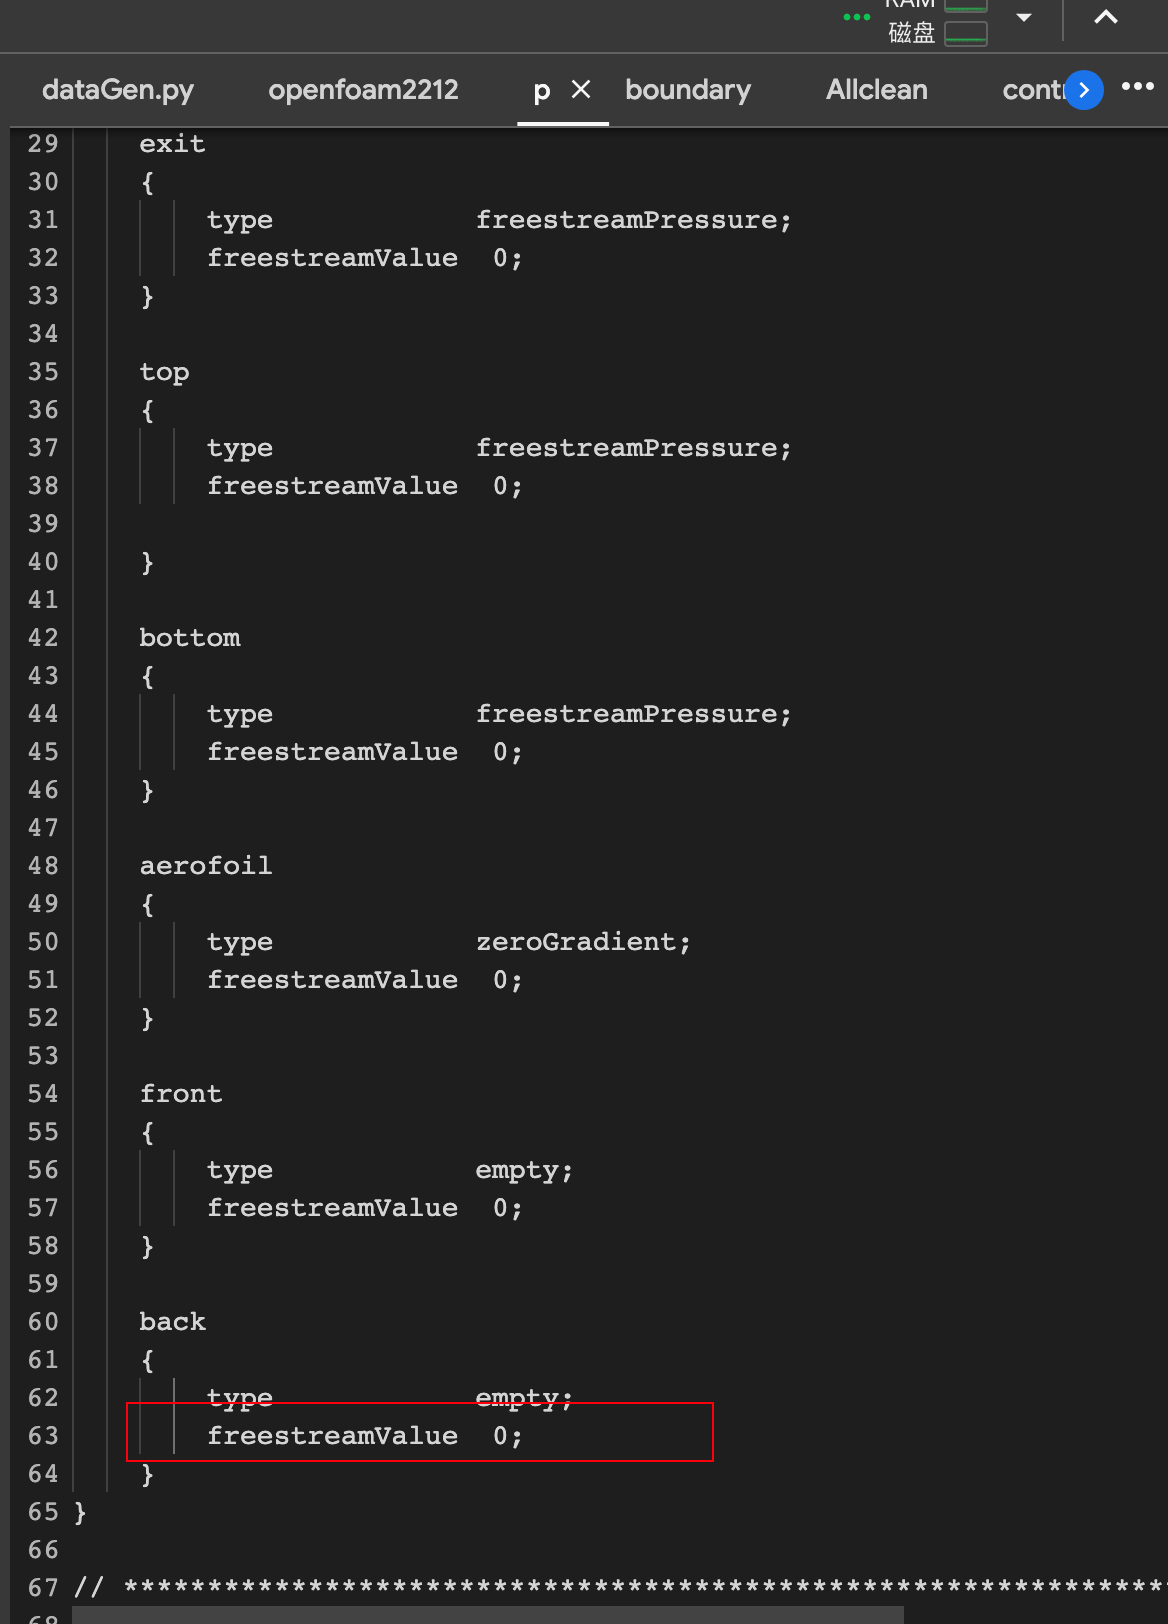

# 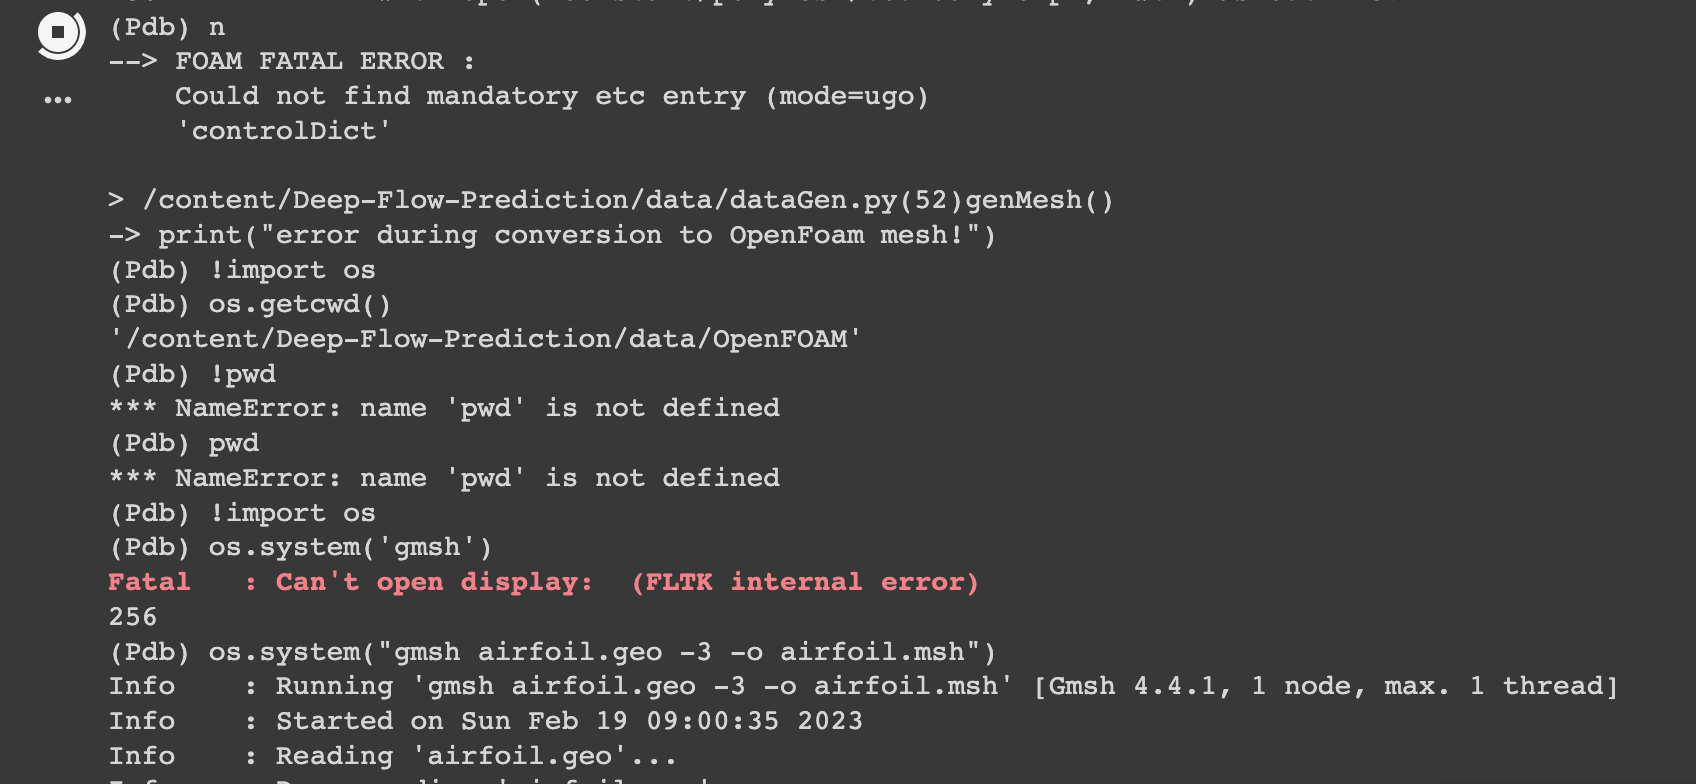